<a href="https://colab.research.google.com/github/annvorosh/GB/blob/ETL/ETL_L02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. Введение в подготовку данных для аналитиков. Таблицы фактов и таблицы измерений
1. Скачайте датасет fifаs2.сsv. Проанализируйте его и определите, какие данные являются неполными. Удалите
ненужные колонки и недостающие значения.

2. Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

3. Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до
36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import drive

# Подключение Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Загрузка данных
df = pd.read_csv('/content/drive/MyDrive/ETL/fifаs2.csv')

In [ ]:
# Анализ данных на наличие пропущенных значений
print(df.info())  # Общая информация о DataFrame
print(df.isnull().sum())  # Сумма пропущенных значений в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        2399 non-null   int64  
 1   Name                      2399 non-null   object 
 2   Age                       2399 non-null   int64  
 3   Nationality               2392 non-null   object 
 4   Overall                   2399 non-null   int64  
 5   Potential                 2399 non-null   int64  
 6   Club                      2158 non-null   object 
 7   Value                     2142 non-null   float64
 8   Wage                      2399 non-null   int64  
 9   Preferred Foot            2399 non-null   object 
 10  International Reputation  2389 non-null   float64
 11  Skill Moves               2393 non-null   float64
 12  Position                  2378 non-null   object 
 13  Joined                    2399 non-null   int64  
 14  Contract

Колонок с полным отсутствием значений не обнаружено.

<ipython-input-20-4db492abb842>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

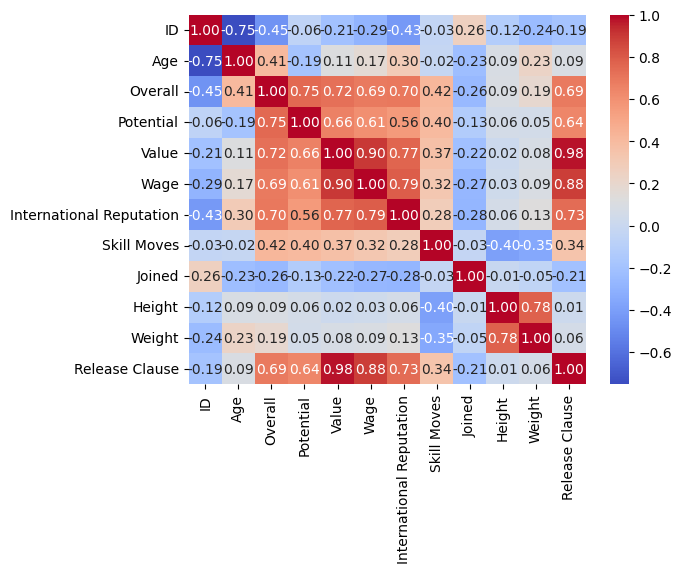

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


Value и Release Clause: Эти два столбца имеют очень высокую корреляцию 0.98, что означает, что они изменяются практически одновременно. Можно считать их взаимозаменяемыми в анализе, так как информация Release Clause может быть уже включена в стоимость Value.

Wage и Value: Также столбцы Wage и Value имеют высокую корреляцию 0.90, что указывает на тесную связь между заработной платой и стоимостью игрока. Они могут быть взаимозаменяемыми в некоторых моделях, так как информация о зарплате также может быть уже учтена в стоимости игрока.

Можно было бы удалить столбцы  Release Clause, Wage, но так как в Value много пропущенных значений, удалим его

In [ ]:
df.drop('Value', axis=1, inplace=True)

Посмотрим есть ли строки, в которых пропущено сразу сного значений

In [ ]:
# Подсчет пропущенных значений в каждой строке
missing_values_per_row = df.isnull().sum(axis=1)

# Фильтрация строк, в которых пропущено хотя бы три значения
rows_with_multiple_missing_values = df[missing_values_per_row >= 3]

rows_with_multiple_missing_values

,ID,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
179,171320,G. Miller,31,Scotland,62,62,Carlisle United,2,Right,NaN,NaN,LB,2016,NaN,5.946771,165.979129,4585.060806
1063,213821,F. Sepúlveda,26,Chile,62,63,CD Antofagasta,1,Right,NaN,NaN,LB,2016,NaN,5.946771,165.979129,4585.060806
1429,225336,E. Binaku,22,Albania,62,70,Malmö FF,1,Right,NaN,NaN,LB,2016,NaN,5.946771,165.979129,4585.060806
1810,234809,E. Guerrero,27,Chile,62,65,CD Palestino,1,Right,NaN,NaN,LB,2016,NaN,5.946771,165.979129,4585.060806
2050,240437,A. Semprini,20,Italy,62,72,Brescia,1,Right,NaN,NaN,LB,2016,NaN,5.946771,165.979129,4585.060806
2244,244022,I. Sissoko,22,France,62,68,AS Béziers,2,Right,NaN,NaN,LB,2016,NaN,5.946771,165.979129,4585.060806


In [ ]:
df['Skill Moves'].fillna(df['Skill Moves'].mode()[0], inplace=True)
df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode()[0], inplace=True)


# Числовые данные (например, International Reputation)
df['International Reputation'].fillna(df['International Reputation'].median(), inplace=True)

In [ ]:
# Подсчет пропущенных значений в каждой строке
missing_values_per_row = df.isnull().sum(axis=1)

# Фильтрация строк, в которых пропущено хотя бы три значения
rows_with_multiple_missing_values = df[missing_values_per_row >= 1]

rows_with_multiple_missing_values

,ID,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
1,5479,Casillas,37,Spain,82,82,FC Porto,10,Left,4.0,1.0,NaN,2015,01/01/2019,6.083333,185.0,3000.000000
12,48940,P. Čech,36,Czech Republic,82,82,Arsenal,60,Left,4.0,1.0,NaN,2015,01/01/2019,6.416667,198.0,5700.000000
48,140222,P. Da Silva,38,Paraguay,72,72,NaN,0,Right,2.0,2.0,RCB,2016,01/01/2019,5.916667,168.0,4585.060806
72,147899,C. Moţi,33,Romania,69,69,NaN,0,Right,1.0,2.0,LCB,2016,01/01/2019,6.000000,172.0,4585.060806
81,153160,R. Raldes,37,Bolivia,70,70,NaN,0,Right,1.0,2.0,LB,2016,01/01/2019,5.916667,172.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,246403,B. Caicedo,26,Ecuador,72,75,NaN,0,Left,1.0,3.0,LB,2016,01/01/2019,5.916667,159.0,4585.060806
2389,246404,J. Cifuente,25,Ecuador,68,70,NaN,0,Right,1.0,3.0,ST,2016,01/01/2019,5.833333,170.0,4585.060806
2390,246405,B. Angulo,22,Ecuador,71,77,NaN,0,Right,1.0,3.0,ST,2016,01/01/2019,6.000000,154.0,4585.060806
2391,246406,X. Arreaga,23,Ecuador,66,71,NaN,0,Right,1.0,2.0,CB,2016,01/01/2019,6.000000,165.0,4585.060806


In [ ]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   7
Overall                       0
Potential                     0
Club                        241
Wage                          0
Preferred Foot                0
International Reputation      0
Skill Moves                   0
Position                     21
Joined                        0
Contract Valid Until          0
Height                        0
Weight                        0
Release Clause                3
dtype: int64


In [ ]:

df['Nationality'].fillna(df['Nationality'].mode()[0], inplace=True)
df['Club'].fillna(df['Club'].mode()[0], inplace=True)
df['Position'].fillna(df['Position'].mode()[0], inplace=True)
df['Release Clause'].fillna(df['Release Clause'].median(), inplace=True)


Найдите в датафрейме полные дубликаты и удалите их. Значения могут быть одинаковыми, но написаны по-разному. Например, может отличаться размер регистра (заглавные и строчные буквы). Особое внимание уделить колонке с названиями команд.

In [ ]:
# Приведение всех строк в колонке с названиями команд к нижнему регистру
cat_columns = ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Position']

for column in cat_columns:
    df[column] = df[column].str.lower()

# Поиск дубликатов, игнорируя различия в регистре
duplicates = df[df.duplicated(keep=False)]
# duplicates
df.drop_duplicates(inplace=True, ignore_index=True)
duplicates

,ID,Name,Age,Nationality,Overall,Potential,Club,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause


Напишите функцию, которая добавит колонку с разбиением возраста по группам: до 20, от 20 до 30, от 30 до 36 и старше 36. Посчитайте количество футболистов в каждой категории.

In [ ]:
def categorize_age(age):
    if age < 20:
        return 'Under 20'
    elif 20 <= age < 30:
        return '20 to 30'
    elif 30 <= age < 36:
        return '30 to 36'
    else:
        return 'Over 36'

# Создание нового столбца 'Age Group'
df['Age Group'] = df['Age'].apply(categorize_age)

# Количество футболистов в каждой категории возраста
player_count_by_age_group = df['Age Group'].value_counts()

player_count_by_age_group


20 to 30    1646
30 to 36     458
Under 20     270
Over 36       23
Name: Age Group, dtype: int64